## 1.Problem Statement

**The primary objective is to identify the significant variables that predict the demand for shared electric cycles. Additionally, We aim to gauge how well these variables describe the electric cycle demands in the Indian market.**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('/kaggle/input/yulu-data/bike_sharing.csv')
data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [3]:
data.shape

(10886, 12)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [5]:
# convert object(datetime) column in to datetime datatype
data['datetime'] = pd.to_datetime(data['datetime'])

In [6]:
#convert categorical cols in to object
cat_col = ['season','holiday','workingday','weather']
for col in cat_col:
    data[col] = data[col].astype('object')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  object        
 2   holiday     10886 non-null  object        
 3   workingday  10886 non-null  object        
 4   weather     10886 non-null  object        
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(4), object(4)
memory usage: 1020.7+ KB


In [8]:
#statistical summary
data.describe(include='all')

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886,10886.0,10886.0,10886.0,10886.0,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
unique,NaN,4.0,2.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,4.0,0.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,2734.0,10575.0,7412.0,7192.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2011-12-27 05:56:22.399411968,NaN,NaN,NaN,NaN,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
min,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2011-07-02 07:15:00,NaN,NaN,NaN,NaN,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,2012-01-01 20:30:00,NaN,NaN,NaN,NaN,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,2012-07-01 12:45:00,NaN,NaN,NaN,NaN,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,2012-12-19 23:00:00,NaN,NaN,NaN,NaN,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [9]:
#null value check
data.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

#### Observations:
1. There are no missing values in the dataset.

2. Attributes casual and registered might have outliers because their mean and median are
   very far away to one another and the value of standard deviation is also high which tells 
   us that there is high variance in the data of these attributes. 

**Univariate Analysis**

In [10]:
# Numerical variables distribution in the given data
num_col = []
for i in data.columns:
    if data[i].dtype == 'int64' or data[i].dtype == 'float64':
        num_col.append(i)
print(num_col)

['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']


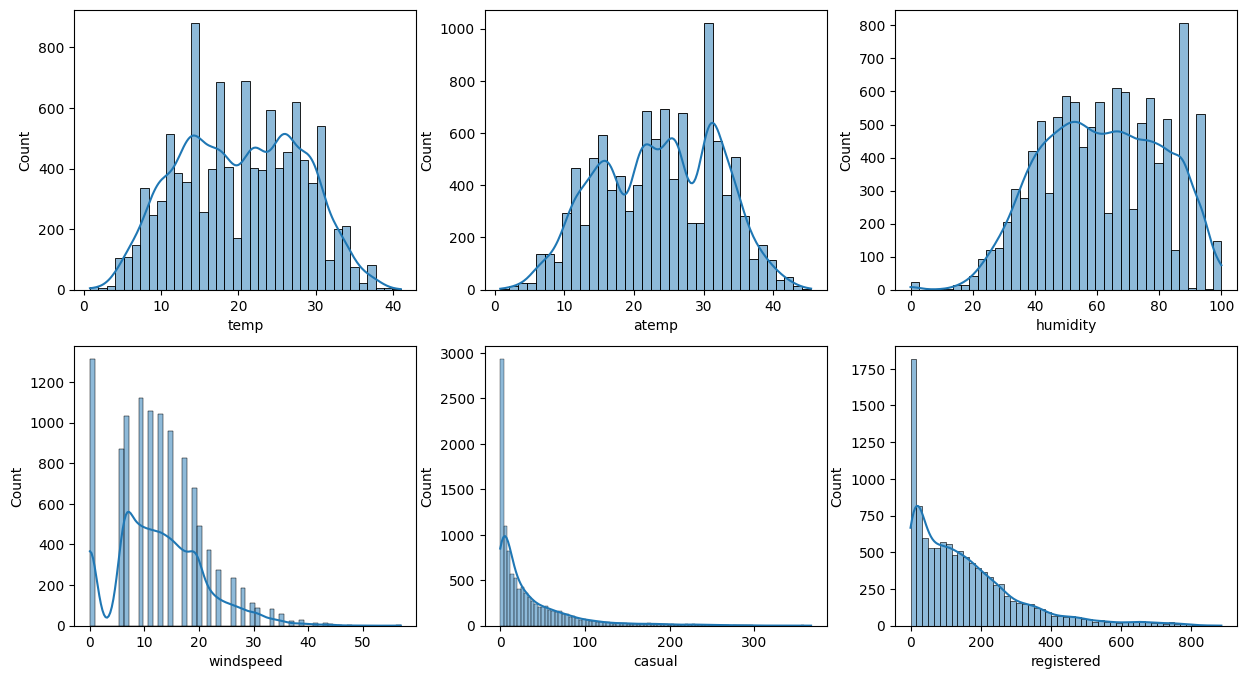

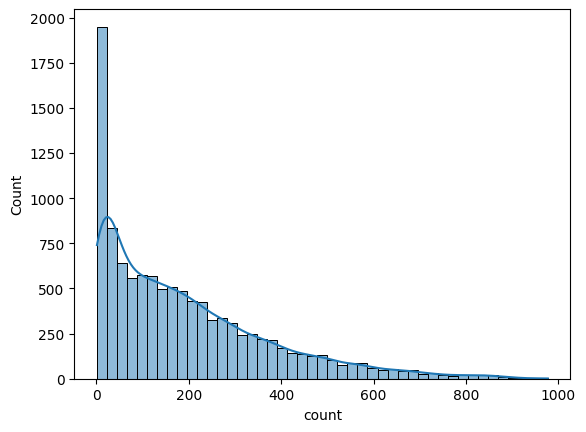

In [11]:
# plotting histogram for numerical columns
index=0
fig,axis = plt.subplots(nrows = 2,ncols=3,figsize=(15,8))
for i in range(2):
    for j in range(3):
        sns.histplot(data[num_col[index]],ax=axis[i,j],kde=True)
        index+=1

plt.show()
sns.histplot(data['count'],kde=True)
plt.show()

#### Observations:
1. Columns temp,atemp,humidity looks like they follow Normal Distribution
2. Columns casual,regsitered,count looks like they follow Log Normal Distribution

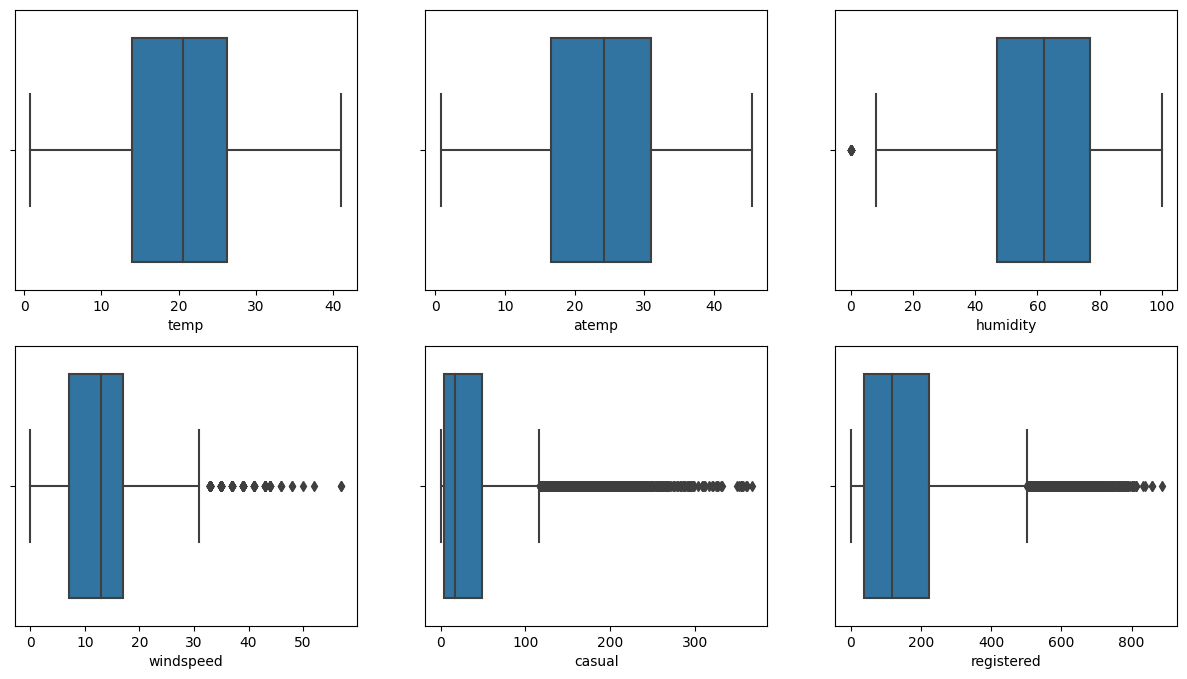

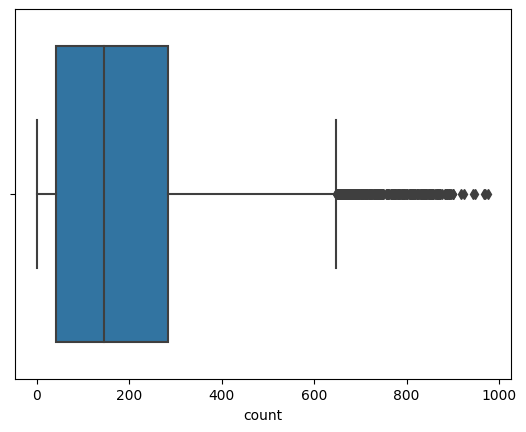

In [12]:
# plotting boxplot to detect outliers in numerical data
fig,axis = plt.subplots(nrows=2,ncols=3,figsize=(15,8))
index=0
for i in range(2):
    for j in range(3):
        sns.boxplot(x=data[num_col[index]],ax=axis[i,j])
        index+=1

plt.show()
sns.boxplot(x=data[num_col[-1]])
plt.show()

#### Observations:
1. As we observed earlier casual,registered,count has more outliers and rest are almost looks like nomally distributed except windspeed

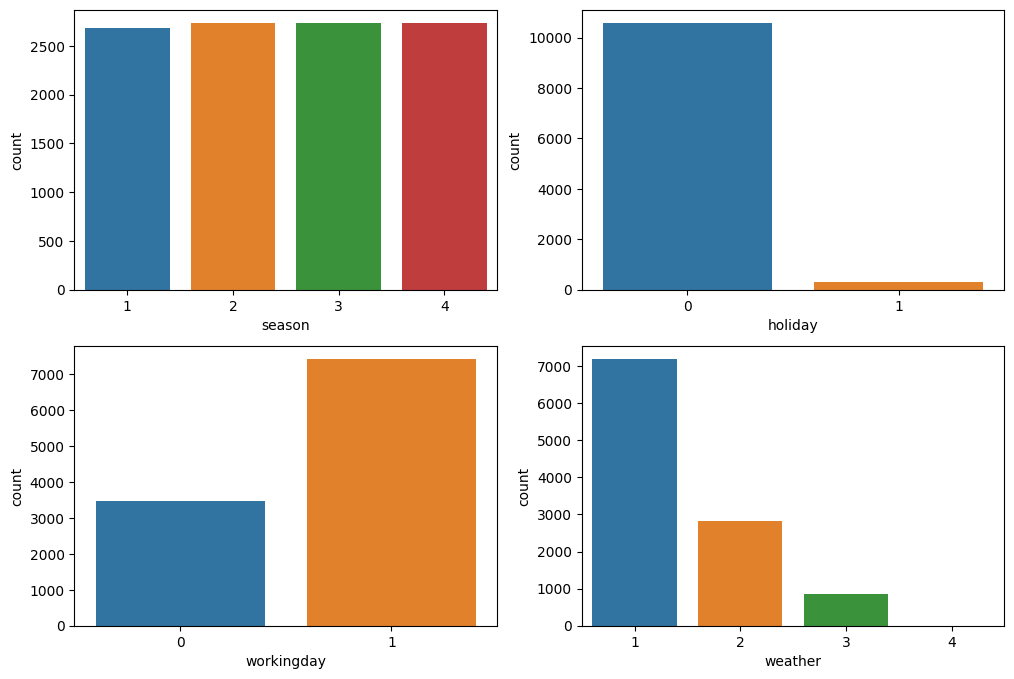

In [13]:
# countplot for categorical columns
cat_col = ['season','holiday','workingday','weather']
fig,axis = plt.subplots(nrows=2,ncols=2,figsize=(12,8))
index=0
for i in range(2):
    for j in range(2):
        sns.countplot(x=data[cat_col[index]],ax=axis[i,j])
        index+=1

#### Observation
1. Data looks like a common or as it should be because count of days are equal in each season
2. Working days are more and weather is mostly Clear, Few clouds, partly cloudy, partly cloudy

**Bi-Variate Analysis**

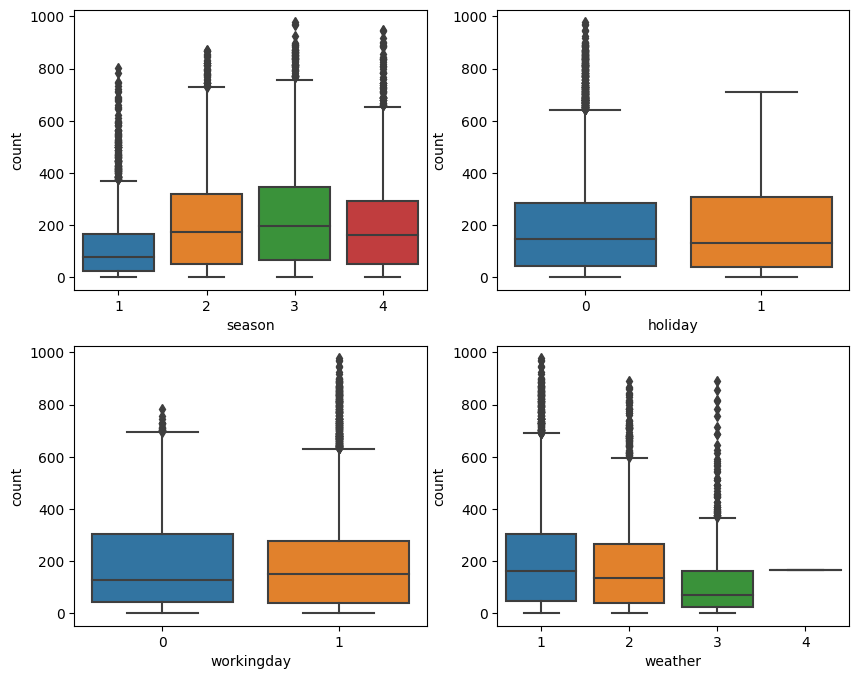

In [14]:
# plotting categorical variables againt count using boxplots
fig, axis = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

index = 0
for row in range(2):
    for col in range(2):
        sns.boxplot(data=data, x=cat_col[index], y='count', ax=axis[row, col])
        index += 1

plt.show()

#### Observations:
1. More bikes are rented in summer and fall compared to other seasons
2. On a Holiday day more bikes are rented
3. From workingday we can confirm that on weekend and holiday more bikes are rented
4. Whenever its Heavy Rain,Thunderstorm,Mist,Snow or Fog very low almost non bikes are rented

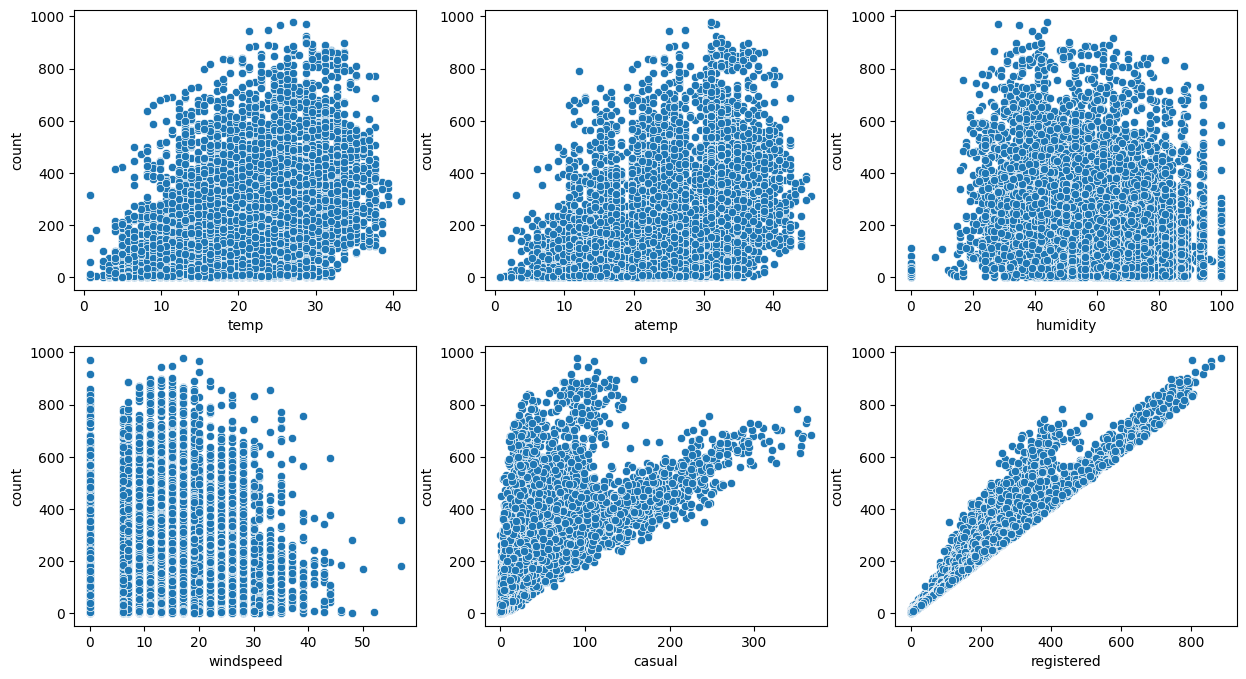

In [15]:
# plotting numerical variables againt count using scatter plot
fig, axis = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))

index = 0
for row in range(2):
    for col in range(3):
        sns.scatterplot(data=data, x=num_col[index], y='count', ax=axis[row, col])
        index += 1

plt.show()

#### Observations:
1. When temp is <5 and >35 bikes rented are low
2. when humidity <20 and >90 bikes rented are low3. When windspeed is >40 bikes rented are low

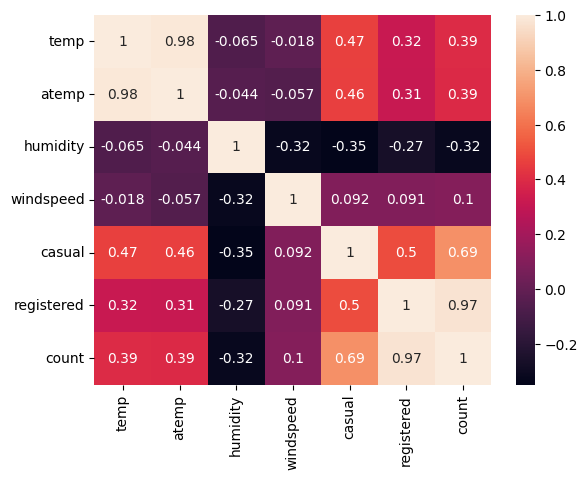

In [16]:
# understanding the correlation between count and numerical variables
data.corr()['count']
sns.heatmap(data[num_col].corr(), annot=True)
plt.show()

## Hypothesis Testing

### Check if there any significant difference between the no. of bike rides on Weekdays and Weekends

In [17]:
#  Null Hypothesis (H0) -> No significant diff bt bike rides on weekdays and weekends
# Alternate Hypothesis (H1) -> There is significant diff bt bike rides on weekdays and weekends(Two tail test)
# alpha=5% is recommended(0.05)

# Here as the sample size is >30 we can use either two sample Z_Test ot T_Test

#Using Z_Test
alpha = 0.05
from statsmodels.stats import weightstats

z_score, pval = weightstats.ztest(x1 = data[data['workingday']==1]['count'], x2 = data[data['workingday']==0]['count'], value = 0, alternative = 'two-sided')
print("Z-score: ", z_score)
print("p-value: ", pval)

Z-score:  1.2096277376026694
p-value:  0.22642176970306893


In [18]:
# Using T_Test
from scipy.stats import ttest_ind
t_stat,p_val = ttest_ind(data[data['workingday']==1]['count'],data[data['workingday']==0]['count'],alternative="two-sided")
print(p_val)
print(t_stat)

0.22644804226361348
1.2096277376026694


In [19]:
if p_val > alpha:
    print('Reject Null Hypothesis')
    print('There is significant diff bt bike rides on weekdays and weekends')
else:
    print('Fai to Reject Null Hypothesis')
    print('There is No significant diff bt bike rides on weekdays and weekends')

Reject Null Hypothesis
There is significant diff bt bike rides on weekdays and weekends


#### Observation:
1. Since pvalue is greater than 0.05 so we cannot reject the Null hypothesis. We don't 
   have the sufficient evidence to say that working day has effect on the number of 
   cycles being rented.

### Check if the demand of bicycles on rent is the same for different Weather conditions

In [25]:
# To check this we can perform ANOVA Test because here we have to compare more than 2 variables at a time for which ANOVA is best

# Null Hypothesis (H0) -> Demand of bicycles in different weather conditions are same
# Alternate Hypothesis (H1) -> Demand of bicycles in different weather conditions are not same

# defining the data groups for the ANOVA
gp1 = data[data['weather']==1]['count'].values
gp2 = data[data['weather']==2]['count'].values
gp3 = data[data['weather']==3]['count'].values
gp4 = data[data['weather']==4]['count'].values

group1 = [gp1,gp2,gp3,gp4]

**Checking Normality of groups using Histogram and QQplot**

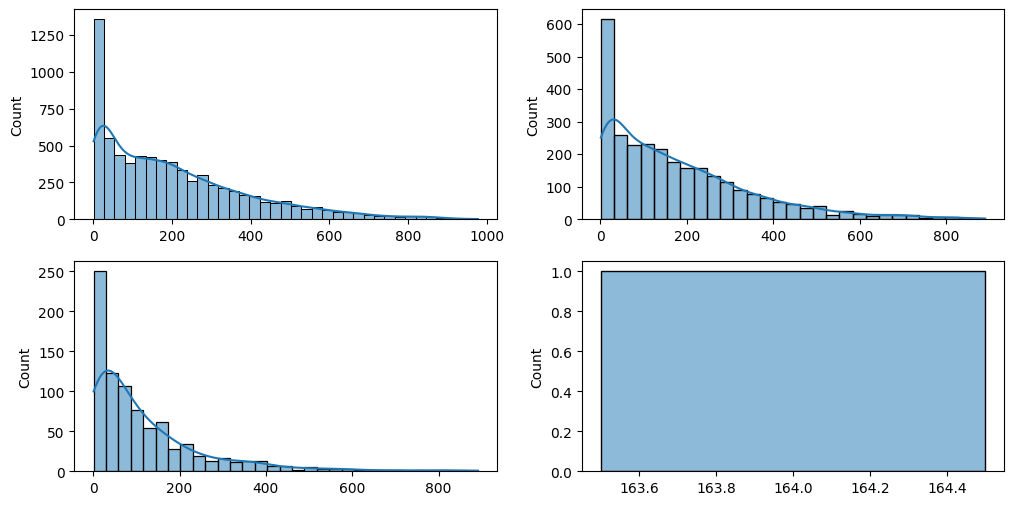

In [26]:
fig, axis = plt.subplots(nrows=2,ncols=2,figsize=(12,6))

index=0

for i in range(2):
    for j in range(2):
        sns.histplot(data = group1[index],ax=axis[i,j],kde=True)
        index+=1
plt.show()

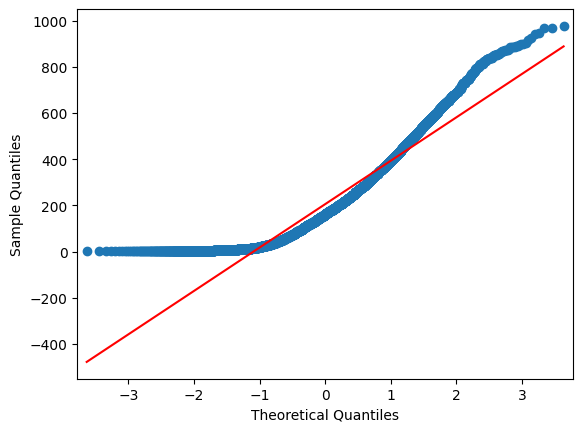

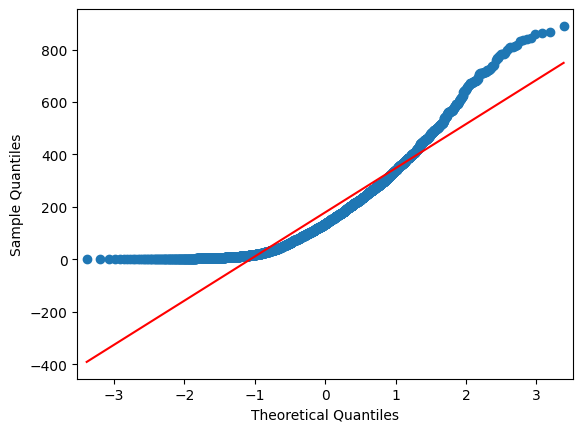

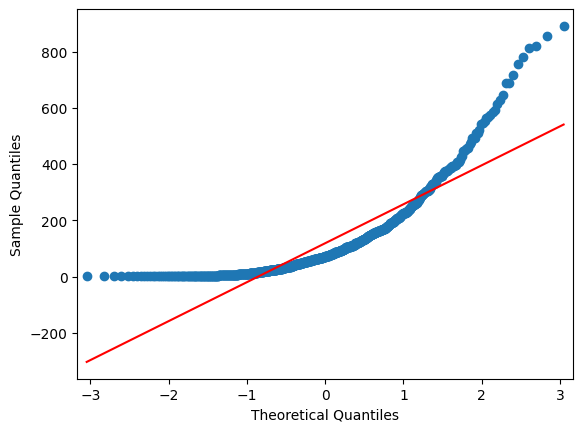

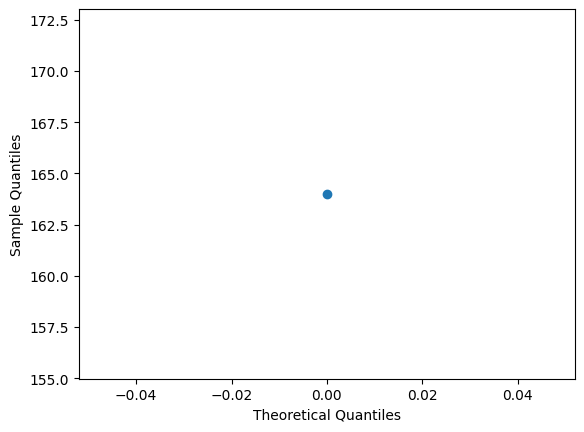

In [28]:
from statsmodels.graphics.gofplots import qqplot #goodness of fit plots

index=0
for i in range(2):
    for j in range(2):
        qqplot(data = group1[index],line='s')
        index+=1
plt.show()

**Checking for Eqaulity of variance between groups**

In [30]:
from scipy.stats import levene
#Null Hypothesis: Variances is similar in different weather conditions

#Alternate Hypothesis: Variances is not similar in different weather conditions.

#Significance level (alpha): 0.05

stat, p_val = levene(gp1,gp2,gp3,gp4)
print(p_val)
if p_val < 0.05:
    print("Reject the Null hypothesis.Variances are not equal")
else:
    print("Fail to Reject the Null hypothesis.Variances are equal")

3.504937946833238e-35
Reject the Null hypothesis.Variances are not equal


**Observation:**
1. Here both Normal Test and Variance Equality Test are failed so we cannot proceed with ANOVA Test we can use **Kruskal Test**

In [32]:
# Kruskal Wallis Test
# If assumptions of ANOVA fail, use kruskal
from scipy.stats import f_oneway, kruskal
stat, p_value = kruskal(gp1,gp2,gp3,gp4)
print(p_value)
if p_value<0.05:
    print("Since p-value is less than 0.05, we reject the null hypothesis i.e, Demand of bicycles on diff weather conditions are not same")

3.501611300708679e-44
Since p-value is less than 0.05, we reject the null hypothesis i.e, Demand of bicycles on diff weather conditions are not same


#### Obsevation:
1. Here the assumotions of ANOVA failed so we used Kruskal Wallis Test to check dependency
2. From the results we can infer that **Demand of bicycles depend on weather conditions**

### Check if the demand of bicycles on rent is the same for different Seasons

In [33]:
# To check this we can perform ANOVA Test because here we have to compare more than 2 variables at a time for which ANOVA is best

# Null Hypothesis (H0) -> Demand of bicycles in different Seasons are same
# Alternate Hypothesis (H1) -> Demand of bicycles in different Seasons are not same

# defining the data groups for the ANOVA
gp5 = data[data['season']==1]['count'].values
gp6 = data[data['season']==2]['count'].values
gp7 = data[data['season']==3]['count'].values
gp8 = data[data['season']==4]['count'].values

group2 = [gp5,gp6,gp7,gp8]

**Checking Normality of groups using Histogram and QQplot**

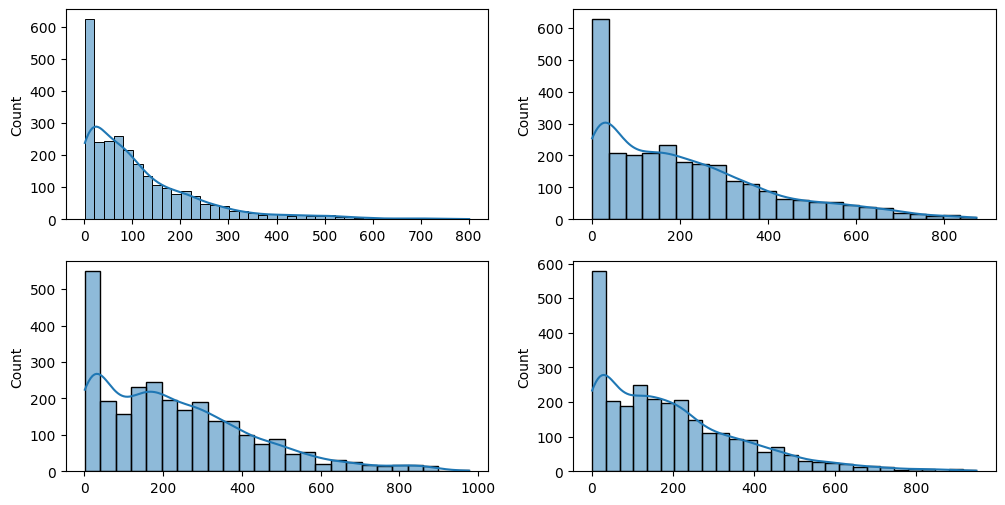

In [34]:
fig, axis = plt.subplots(nrows=2,ncols=2,figsize=(12,6))

index=0

for i in range(2):
    for j in range(2):
        sns.histplot(data = group2[index],ax=axis[i,j],kde=True)
        index+=1
plt.show()

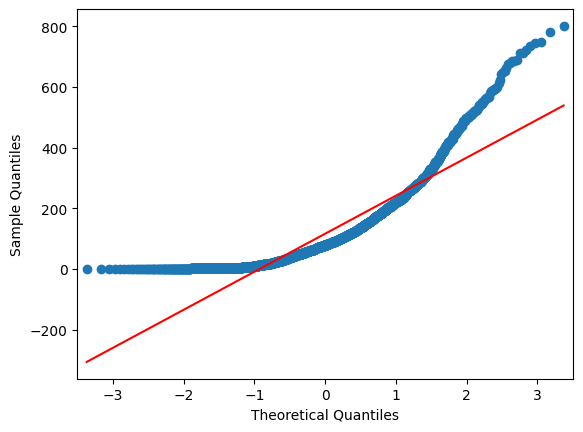

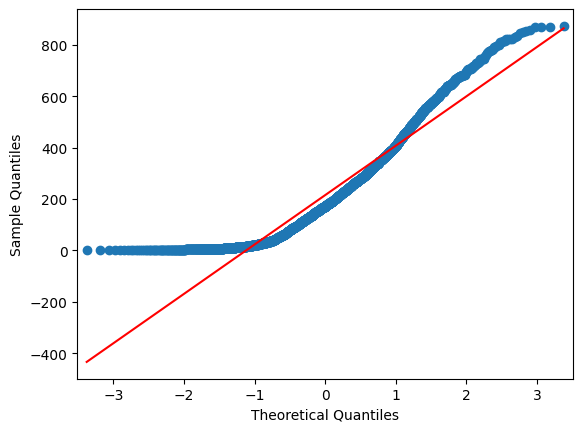

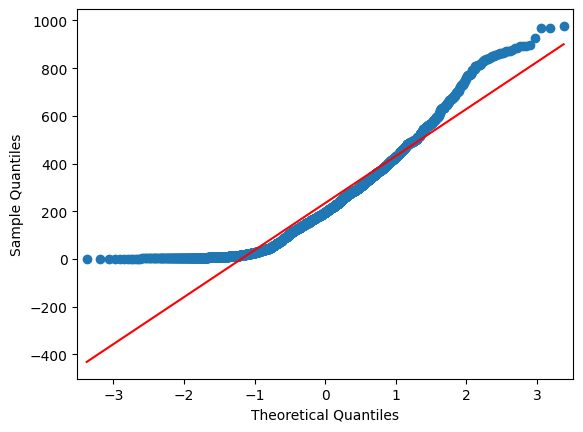

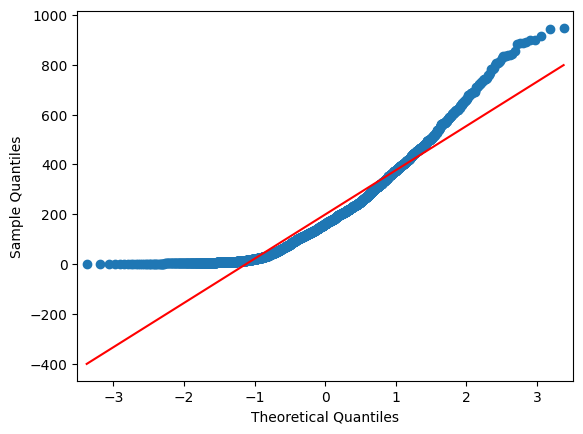

In [36]:
from statsmodels.graphics.gofplots import qqplot #goodness of fit plots

index=0
for i in range(2):
    for j in range(2):
        qqplot(data = group2[index],line='s')
        index+=1
plt.show()

**Checking for Eqaulity of variance between groups**

In [37]:
from scipy.stats import levene
#Null Hypothesis: Variances is similar in different Seasons

#Alternate Hypothesis: Variances is not similar in different Seasons.

#Significance level (alpha): 0.05

stat, p_val = levene(gp5,gp6,gp7,gp8)
print(p_val)
if p_val < 0.05:
    print("Reject the Null hypothesis.Variances are not equal")
else:
    print("Fail to Reject the Null hypothesis.Variances are equal")

1.0147116860043298e-118
Reject the Null hypothesis.Variances are not equal


**Observation:**

1. Here both Normal Test and Variance Equality Test are failed so we cannot proceed with ANOVA Test we can use **Kruskal Test**

In [39]:
# Kruskal Wallis Test
# If assumptions of ANOVA fail, use kruskal
from scipy.stats import f_oneway, kruskal
stat, p_value = kruskal(gp5,gp6,gp7,gp8)
print(p_value)
if p_value<0.05:
    print("Since p-value is less than 0.05, we reject the null hypothesis i.e, Demand of bicycles in different Seasons are not same")

2.479008372608633e-151
Since p-value is less than 0.05, we reject the null hypothesis i.e, Demand of bicycles in different Seasons are not same


#### Obsevation:
1. Here the assumotions of ANOVA failed so we used Kruskal Wallis Test to check dependency
2. From the results we can infer that **Demand of bicycles depend on Seasons**

### Check if the Weather conditions are significantly different during different Seasons

In [40]:
# To check this dependency we can perform Chi-Square Test on the data of weather conditions and Seasons

# Null Hypothesis(H0) -> Weather conditions are same during diff seasons(independent)
# Alternate Hypothesis(H1) -> Weather conditions are different during diff seasons(dependent)
# alpha = 0.05(5%)

data_table = pd.crosstab(data['season'],data['weather'])
data_table

weather,1,2,3,4
season,,,,
1,1759,715,211,1
2,1801,708,224,0
3,1930,604,199,0
4,1702,807,225,0


In [41]:
from scipy.stats import chisquare # Statistical test (chistat, pvalue)
from scipy.stats import chi2 # pdf of chi2 dist

In [44]:
from scipy.stats import chi2_contingency

chi_stat, p_value, df, exp_freq  = chi2_contingency(data_table)
print("chi_stat:",chi_stat)
print("p_value:",p_value)
print("df:",df)
print("exp_freq:",exp_freq)

if p_val <= alpha:
    print("\nSince p-value is less than the alpha 0.05, We reject the Null Hypothesis. Meaning that Weather is dependent on the season.")
else:
    print("Since p-value is greater than the alpha 0.05, We do not reject the Null Hypothesis")

chi_stat: 49.158655596893624
p_value: 1.549925073686492e-07
df: 9
exp_freq: [[1.77454639e+03 6.99258130e+02 2.11948742e+02 2.46738931e-01]
 [1.80559765e+03 7.11493845e+02 2.15657450e+02 2.51056403e-01]
 [1.80559765e+03 7.11493845e+02 2.15657450e+02 2.51056403e-01]
 [1.80625831e+03 7.11754180e+02 2.15736359e+02 2.51148264e-01]]

Since p-value is less than the alpha 0.05, We reject the Null Hypothesis. Meaning that Weather is dependent on the season.


#### Observations:
1. The chi-square test can be used to compare two categorical data
2. From the results we can infer that **Weather is dependent on the Season**

# Observations and Recommendations

### Exploratory Data Analysis (EDA) Observations and Recommendations:

<Axes: xlabel='workingday'>

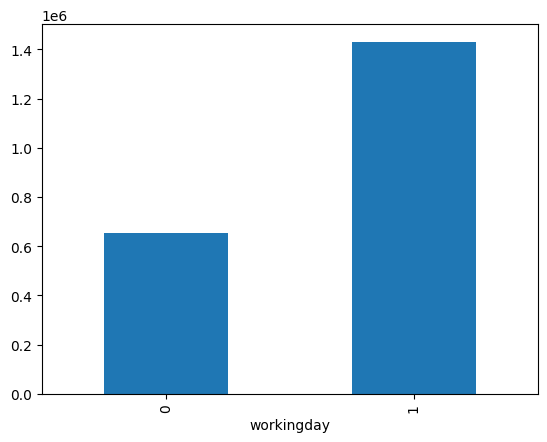

In [47]:
data.groupby('workingday')['count'].sum().plot(kind='bar')

**Working Day vs. Bike Rides:**
* On working days, there is a noticeable difference in the number of bike rides compared to non-working days (weekends and holidays).

**Recommendation:** 
* Consider promotions to attract more users on weekdays and retain available customers,this could involve targeted promotions or partnerships with workplaces.To attract more users on weekend and holiday provide more offers and vouchers that can gain audience attention

<Axes: xlabel='season'>

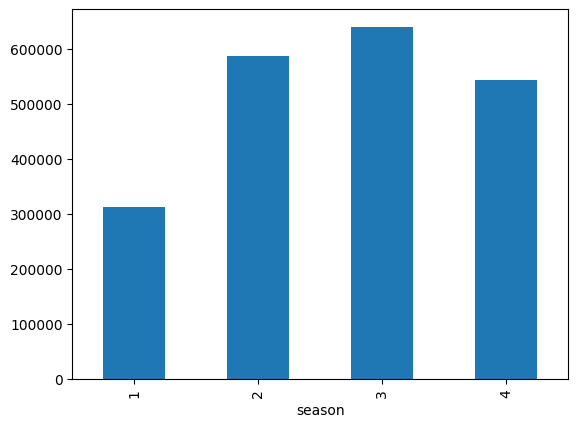

In [48]:
data.groupby('season')['count'].sum().plot(kind='bar')

**Seasonal Impact on Bike Rides:**
* The data indicates varying demand for bike rides across different seasons, with potential peaks in certain seasons. 

**Recommendation:**
* Plan seasonal promotions or events to capitalize on increased demand during specific seasons. For example, offer discounts during peak biking seasons.We can even launch an extension like premium version to rent bikes with guarntee and fail proof with some concession if fails

<Axes: xlabel='weather'>

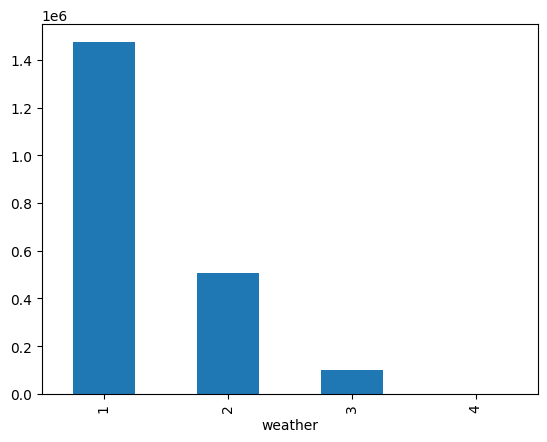

In [49]:
data.groupby('weather')['count'].sum().plot(kind='bar')

**Weather Conditions:**
* Weather conditions seem to influence bike rides, with clear weather attracting more users.

**Recommendation:**
* Implement weather-based promotions or incentives. For instance, offer discounts or rewards on days with favorable weather conditions.

### Recommendations From Hypothesis Testing Results:

**Working Day Impact:**
* The 2-sample t-test suggests a significant difference in the number of bike rides between working days and weekends.

**Recommendation:**
* Focus on weekdays for targeted marketing, promotions, or service improvements to enhance the user experience during working days.

**Seasonal and Weather Impact:**
* The ANOVA test indicates differences in the number of bike rides across different weather conditions and seasons.

**Recommendation:**
* Tailor marketing strategies and promotions based on weather and season patterns. For example, promote indoor activities during adverse weather conditions.

**Weather-Season Dependency:**
* The chi-square test shows whether weather conditions are dependent on seasons.

**Recommendation:**
* Understand the relationship between weather and seasons to optimize operations. For instance, adjust bike availability or maintenance schedules based on expected weather patterns.

### General Recommendations:

**User Engagement:**
* Implement strategies to engage users during specific seasons or weather conditions.Offer loyalty programs or rewards for consistent users to enhance customer retention.


**Data Collection and Monitoring:**
* Continue monitoring user patterns, especially during changing seasons and weather conditions. Regularly update marketing strategies based on the latest data insights.


**User Experience Improvement:**
* Gather user feedback to identify areas of improvement in user experience. Implement changes to the app or service to enhance overall satisfaction.


**Partnerships and Collaborations:**
* Explore partnerships with local businesses or events to boost bike rides during specific occasions or festivals.